In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np


In [4]:
digits=fetch_openml("mnist_784")

In [25]:
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [26]:
digits.target=digits.target.astype(np.int8)

In [27]:
digits.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
digits.target

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [29]:
x=digits.data
y=digits.target

In [30]:

scaller=StandardScaler()
x=scaller.fit_transform(x)
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
ohe=OneHotEncoder()
y = y.reshape(-1, 1)
y = ohe.fit_transform(y).toarray()
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:

###deep learning

In [34]:
trainX,testX,trainY,testY= train_test_split(x,y,test_size=0.2,random_state=12)

In [35]:
model=Sequential()
model.add(Dense(80,activation="relu",input_shape=(784,)))
model.add(Dense(70,activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(60,activation="relu"))
model.add(Dense(70,activation="relu"))
model.add(Dense(80,activation="relu"))
##there are 10 classes from 0 to 10 so o/p will have 10 nuerons
model.add(Dense(10,activation="softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history=model.fit(trainX,trainY,validation_split=0.2,epochs=20,batch_size=len(trainX))


Epoch 1/20
1/1 [==============================] - 0s 272ms/step - loss: 2.3066 - accuracy: 0.0862 - val_loss: 2.2627 - val_accuracy: 0.1846
Epoch 2/20
1/1 [==============================] - 0s 147ms/step - loss: 2.2612 - accuracy: 0.1853 - val_loss: 2.2224 - val_accuracy: 0.2773
Epoch 3/20
1/1 [==============================] - 0s 175ms/step - loss: 2.2209 - accuracy: 0.2753 - val_loss: 2.1782 - val_accuracy: 0.3329
Epoch 4/20
1/1 [==============================] - 0s 180ms/step - loss: 2.1767 - accuracy: 0.3323 - val_loss: 2.1261 - val_accuracy: 0.3612
Epoch 5/20
1/1 [==============================] - 0s 158ms/step - loss: 2.1246 - accuracy: 0.3624 - val_loss: 2.0646 - val_accuracy: 0.3770
Epoch 6/20
1/1 [==============================] - 0s 155ms/step - loss: 2.0628 - accuracy: 0.3759 - val_loss: 1.9948 - val_accuracy: 0.3829
Epoch 7/20
1/1 [==============================] - 0s 161ms/step - loss: 1.9923 - accuracy: 0.3848 - val_loss: 1.9182 - val_accuracy: 0.3910
Epoch 8/20
1/1 [====

In [36]:
history.history

{'accuracy': [0.08624999970197678,
  0.1852901726961136,
  0.27531251311302185,
  0.3322767913341522,
  0.36236608028411865,
  0.37591516971588135,
  0.384754478931427,
  0.39252233505249023,
  0.40104910731315613,
  0.41620534658432007,
  0.44064733386039734,
  0.47368302941322327,
  0.5172544717788696,
  0.5622321367263794,
  0.6096875071525574,
  0.6572991013526917,
  0.6967633962631226,
  0.7200892567634583,
  0.7380133867263794,
  0.7584375143051147],
 'loss': [2.3066248893737793,
  2.261223077774048,
  2.220895528793335,
  2.176748037338257,
  2.1245734691619873,
  2.0628490447998047,
  1.9922624826431274,
  1.914729356765747,
  1.8324215412139893,
  1.747556209564209,
  1.6612468957901,
  1.57264244556427,
  1.4799526929855347,
  1.3822357654571533,
  1.2801084518432617,
  1.1759265661239624,
  1.0741938352584839,
  0.9805817604064941,
  0.8967921733856201,
  0.8210048079490662],
 'val_accuracy': [0.1845535784959793,
  0.2773214280605316,
  0.33294641971588135,
  0.3611607253551

In [37]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]

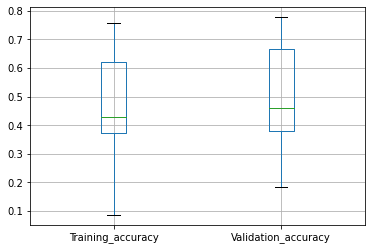

In [38]:
plot_op=pd.DataFrame({
    "Training_accuracy":accuracy,
    "Validation_accuracy":val_accuracy
})
plot_op.boxplot()

In [39]:
y_pred=np.round(model.predict(testX))
y_pred


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
y_pred_classes=model.predict_classes(testX)
y_pred_classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 7, 1, ..., 6, 7, 2])

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(testY,y_pred)

0.6191428571428571